In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.utils.vis_utils import plot_model
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid']=False

In [2]:
df = pd.read_csv('/content/avg_year_resampled - Copy.csv', delimiter=',')
df1= pd.read_csv('/content/extreme_summer - Copy.csv', delimiter=',')
df

,Time,sum_Qdot_HIL3,sum_Qdot_HIL2,sum_Qdot_HIL1,T_out_Boiler,Qdot_Storage_out,Qdot_boiler,Sum_Qdot_h_total,T_ret,T_sup,...,Solar_Radiation_diffuse_horizontal,Solar Radiation,Solar_Radiation_diffuse_surface,Solar_Radiation_direct_surface,Station_Pressure,Temperature_Sky_Radiation,Wind_Direction,Wind_Speed,Zenith_Angle,Temperature_Ambient
0,0,29144.260450,29101.322170,114959.06240,100.000000,0.00000,91516.11678,173204.64500,100.000000,100.000000,...,0.0,0.0,0.0,0.000000,98970.00000,-15.00,180.000000,2.1,150.960000,-2.700000
1,600,29144.313180,29101.360580,114959.16770,110.246194,161319.26820,88803.67278,173204.84150,76.764398,102.624980,...,0.0,0.0,0.0,0.000000,98970.00000,-15.00,180.000000,2.1,150.960000,-2.700000
2,1200,29144.365900,29101.398970,114959.27300,113.368495,205039.34450,118949.02550,173205.03790,74.452026,105.183496,...,0.0,0.0,0.0,0.000000,98970.00000,-15.00,180.000000,2.1,150.960000,-2.700000
3,1800,29144.418610,29101.437370,114959.37830,113.144765,201277.91010,128741.96300,173205.23420,75.355026,106.301642,...,0.0,0.0,0.0,0.000000,98970.00000,-15.00,180.000000,2.1,150.960000,-2.700000
4,2400,29144.471300,29101.475750,114959.48350,111.708543,196044.74950,132131.05480,173205.43060,75.920217,106.559086,...,0.0,0.0,0.0,0.000000,98970.00000,-15.00,180.000000,2.1,150.960000,-2.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41994,25196400,7043.775922,2421.536555,29693.73750,95.937223,58334.82862,78970.80898,39159.04998,77.170002,95.430251,...,152.0,451.0,152.0,94.000000,98730.00000,-3.40,210.000000,3.0,71.700000,10.400000
41995,25197000,7189.136117,2722.122873,30457.10759,95.933997,58947.55011,78904.85088,40368.36658,77.073986,95.422802,...,139.5,427.5,139.5,85.666667,98726.66667,-3.75,206.666667,3.0,72.931667,10.433333
41996,25197600,7356.233844,3046.186669,31308.88747,95.938461,60128.85691,78984.97408,41711.30798,76.894728,95.417787,...,127.0,404.0,127.0,77.333333,98723.33333,-4.10,203.333333,3.0,74.163333,10.466667
41997,25198200,7526.117896,3398.852071,32198.27741,95.947661,61501.27292,79221.12657,43123.24738,76.690870,95.416585,...,114.5,380.5,114.5,69.000000,98720.00000,-4.45,200.000000,3.0,75.395000,10.500000


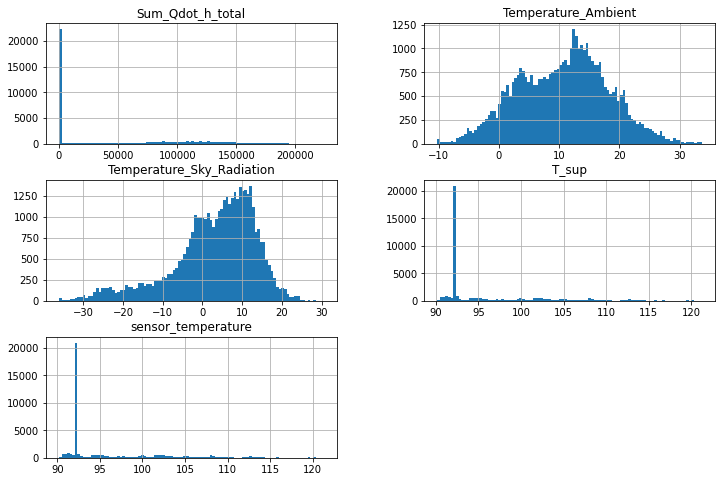

In [ ]:
df[['Sum_Qdot_h_total','Temperature_Ambient','Temperature_Sky_Radiation','T_sup','sensor_temperature']].hist(stacked=False, bins=100, figsize=(12,8));

In [ ]:
import numpy as np
import math
df["x_norm"] = 2 * math.pi * df["Time"] / df["Time"].max()
df1["x_norm"] = 2 * math.pi * df1["Time"] / df1["Time"].max()
df["cos_x"] = np.cos(df["x_norm"])
df1["cos_x"]= np.cos(df["x_norm"])
#df[df["cos_x"] < 0] = 0
#df1[df1["cos_x"] < 0] = 0
#display(df)
#display(df1)
#import plotly.graph_objects as go

#fig = go.Figure()

#fig.add_trace(go.Scatter(x=df.x_norm, y=df.cos_x))

#fig.update_layout(yaxis = dict(scaleanchor = "x", scaleratio = 1))

#fig.show()
#plt.plot(df["Time",df["cos_x"]])

In [ ]:
df.loc[40752:41616]

,Time,sum_Qdot_HIL3,sum_Qdot_HIL2,sum_Qdot_HIL1,T_out_Boiler,Qdot_Storage_out,Qdot_boiler,Sum_Qdot_h_total,T_ret,T_sup,...,Solar_Radiation_beam_normal,Solar_Radiation_diffuse_horizontal,Solar_Radiation_diffuse_surface,Solar_Radiation_direct_surface,Station_Pressure,Temperature_Sky_Radiation,Wind_Direction,Wind_Speed,Zenith_Angle,Temperature_Ambient
40752,24451200,14020.167910,13649.913690,56021.71797,91.726427,98097.04089,117741.72920,83691.79957,68.093320,91.243933,...,0.0,0.0,0.0,0.0,98160.00000,5.300000,210.000000,1.000000,135.380,9.200000
40753,24451800,14058.093610,13688.928260,56177.66538,91.852915,101203.47010,118415.92520,83924.68725,67.759031,91.295567,...,0.0,0.0,0.0,0.0,98166.66667,5.266667,206.666667,0.833333,135.180,9.166667
40754,24452400,14096.019320,13727.942830,56333.61280,91.910825,101859.09040,118866.57220,84157.57495,67.716271,91.361198,...,0.0,0.0,0.0,0.0,98173.33333,5.233333,203.333333,0.666667,134.980,9.133333
40755,24453000,14133.945030,13766.957400,56489.56023,91.916591,102090.83640,119047.90280,84390.46266,67.714644,91.411587,...,0.0,0.0,0.0,0.0,98180.00000,5.200000,200.000000,0.500000,134.780,9.100000
40756,24453600,14171.870750,13805.971980,56645.50767,91.906170,102233.03630,119139.45090,84623.35040,67.713010,91.441215,...,0.0,0.0,0.0,0.0,98186.66667,5.166667,196.666667,0.333333,134.580,9.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41612,24967200,9860.638586,9099.224623,39632.73774,91.560041,76626.64647,98395.01911,58592.60095,70.315242,91.094576,...,0.0,0.0,0.0,0.0,98416.66667,10.700000,210.000000,4.000000,136.170,12.500000
41613,24967800,9803.992174,9040.855492,39399.27635,91.574714,76272.44500,98043.61260,58244.12402,70.367300,91.105306,...,0.0,0.0,0.0,0.0,98405.00000,10.750000,210.000000,4.000000,136.535,12.550000
41614,24968400,9747.345765,8982.486364,39165.81497,91.592001,75942.89108,97715.36250,57895.64710,70.417191,91.118081,...,0.0,0.0,0.0,0.0,98393.33333,10.800000,210.000000,4.000000,136.900,12.600000
41615,24969000,9690.699360,8924.117238,38932.35359,91.607461,75612.71752,97386.30842,57547.17019,70.467848,91.132063,...,0.0,0.0,0.0,0.0,98381.66667,10.850000,210.000000,4.000000,137.265,12.650000


In [ ]:
plt.plot(df["Time"]/86400,df1["cos_x"])

KeyError: ignored

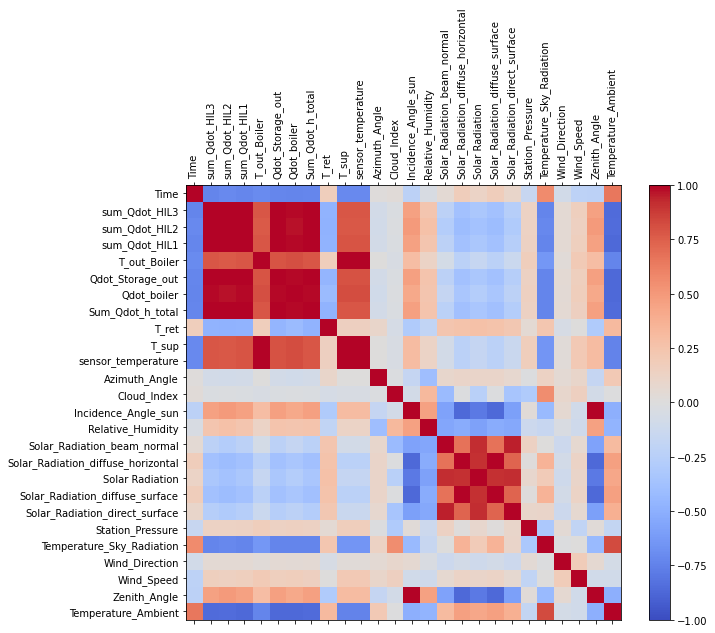

In [ ]:
import numpy as np
corr=df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [ ]:
df['T_sup'].corr(df['Temperature_Sky_Radiation'])

-0.6417155271983161

In [ ]:
df.corr(method='pearson', min_periods=1)

,Time,sum_Qdot_HIL3,sum_Qdot_HIL2,sum_Qdot_HIL1,T_out_Boiler,Qdot_Storage_out,Qdot_boiler,Sum_Qdot_h_total,T_ret,T_sup,...,Solar_Radiation_diffuse_horizontal,Solar Radiation,Solar_Radiation_diffuse_surface,Solar_Radiation_direct_surface,Station_Pressure,Temperature_Sky_Radiation,Wind_Direction,Wind_Speed,Zenith_Angle,Temperature_Ambient
Time,1.000000,-0.728396,-0.708508,-0.723887,-0.699604,-0.726031,-0.731061,-0.722753,0.168438,-0.705199,...,0.171894,0.121551,0.171894,0.094196,-0.151329,0.564485,-0.079776,-0.215691,-0.222122,0.651306
sum_Qdot_HIL3,-0.728396,1.000000,0.994446,0.999712,0.781547,0.999276,0.987274,0.999730,-0.475631,0.789061,...,-0.372284,-0.324161,-0.372284,-0.262745,0.132471,-0.728262,0.053880,0.159393,0.458982,-0.858471
sum_Qdot_HIL2,-0.708508,0.994446,1.000000,0.994117,0.767811,0.994947,0.975059,0.995942,-0.476788,0.774956,...,-0.401451,-0.364096,-0.401451,-0.290083,0.128553,-0.714014,0.052441,0.142349,0.494589,-0.848047
sum_Qdot_HIL1,-0.723887,0.999712,0.994117,1.000000,0.783554,0.999452,0.987746,0.999821,-0.472536,0.790952,...,-0.372286,-0.323353,-0.372286,-0.262123,0.134085,-0.731261,0.052853,0.157120,0.459410,-0.860207
T_out_Boiler,-0.699604,0.781547,0.767811,0.783554,1.000000,0.791445,0.809826,0.781313,0.168221,0.998287,...,-0.226863,-0.160172,-0.226863,-0.131702,0.169749,-0.640581,0.025347,0.200223,0.291706,-0.732468
Qdot_Storage_out,-0.726031,0.999276,0.994947,0.999452,0.791445,1.000000,0.988847,0.999515,-0.460133,0.798403,...,-0.373742,-0.325594,-0.373742,-0.263274,0.135132,-0.730591,0.052167,0.157316,0.461475,-0.860644
Qdot_boiler,-0.731061,0.987274,0.975059,0.987746,0.809826,0.988847,1.000000,0.986425,-0.419464,0.815597,...,-0.332212,-0.272134,-0.332212,-0.222334,0.140929,-0.731596,0.046374,0.169858,0.415774,-0.864186
Sum_Qdot_h_total,-0.722753,0.999730,0.995942,0.999821,0.781313,0.999515,0.986425,1.000000,-0.474134,0.788695,...,-0.377311,-0.330348,-0.377311,-0.266968,0.133028,-0.728566,0.053003,0.155242,0.465408,-0.858654
T_ret,0.168438,-0.475631,-0.476788,-0.472536,0.168221,-0.460133,-0.419464,-0.474134,1.000000,0.154831,...,0.257412,0.268763,0.257412,0.219126,0.052274,0.230265,-0.051722,0.003341,-0.292973,0.318462
T_sup,-0.705199,0.789061,0.774956,0.790952,0.998287,0.798403,0.815597,0.788695,0.154831,1.000000,...,-0.231447,-0.164875,-0.231447,-0.135462,0.167452,-0.641716,0.028126,0.203157,0.296997,-0.737137


<function matplotlib.pyplot.show(*args, **kw)>

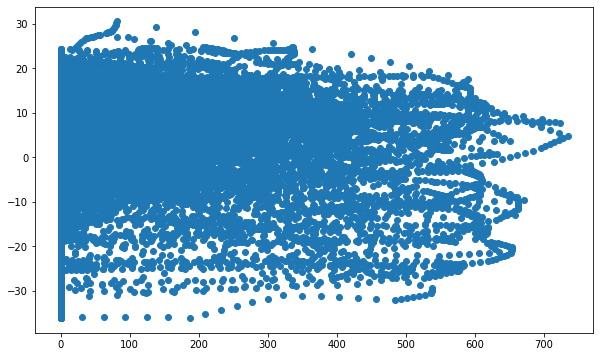

In [ ]:
fig=plt.figure(figsize=(10,6))
plt.scatter(df['Solar_Radiation_beam_normal'],df['Temperature_Sky_Radiation'])
plt.show

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52561 entries, 0 to 52560
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Time                                52561 non-null  int64  
 1   sum_Qdot_HIL3                       52561 non-null  float64
 2   sum_Qdot_HIL2                       52561 non-null  float64
 3   sum_Qdot_HIL1                       52561 non-null  float64
 4   T_out_Boiler                        52561 non-null  float64
 5   Qdot_Storage_out                    52561 non-null  float64
 6   Qdot_boiler                         52561 non-null  float64
 7   Sum_Qdot_h_total                    52561 non-null  float64
 8   T_ret                               52561 non-null  float64
 9   T_sup                               52561 non-null  float64
 10  sensor_temperature                  52561 non-null  float64
 11  Azimuth_Angle                       52561

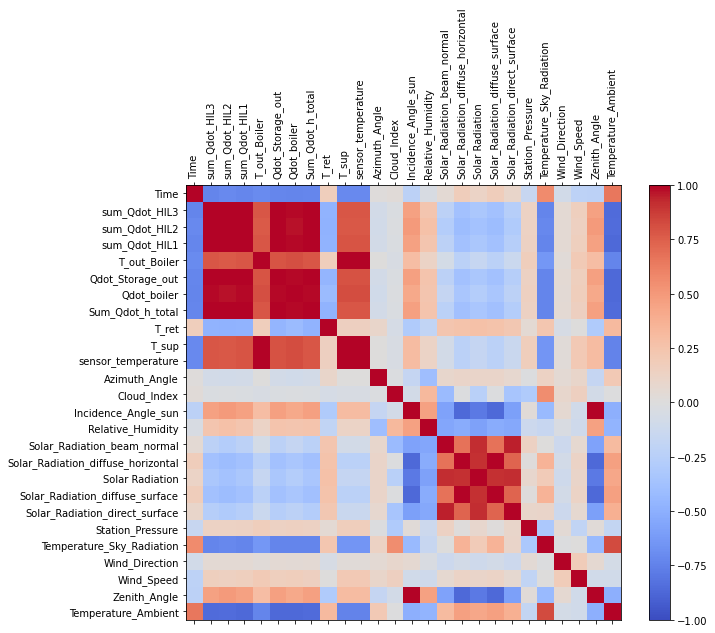

In [ ]:
import numpy as np
corr=df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [13]:
df_input=df['Qdot_Storage_out']
df1_input=df1['Qdot_Storage_out']

0             0.00000
1        127141.16500
2        169058.33040
3        165878.61720
4        160474.54870
             ...     
41994     40282.63082
41995     41378.54025
41996     42555.34534
41997     43759.26033
41998     44984.90131
Name: Qdot_Storage_out, Length: 41999, dtype: float64

In [12]:
a=df_input.to_numpy()
b=df1_input.to_numpy()
b=b.reshape(-1,1)
a=a.reshape(-1,1)
b

array([[     0.     ],
       [127141.165  ],
       [169058.3304 ],
       ...,
       [ 42555.34534],
       [ 43759.26033],
       [ 44984.90131]])

In [14]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(a)
data_scaled_test=scaler.fit_transform(b[40752:42000])
data_scaled

array([[0.        ],
       [0.65609009],
       [0.83390089],
       ...,
       [0.24454578],
       [0.25012744],
       [0.25614896]])

In [15]:
features=data_scaled
target=data_scaled[:,0]
features_test=data_scaled_test
target_test=data_scaled_test[:,0]

In [16]:
tf.keras.preprocessing.sequence.TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.        ],
         [0.65609009]]]), array([0.83390089]))

In [17]:
#x_train, y_train = train_test_split(features, target)
X_test,Y_test=(features_test, target_test)
x_train, y_train=(features, target)
#x_train, x_test, y_train, y_test=train_test_split(features, target, test_size=0.001, random_state=123, shuffle=False)

In [18]:
X_test.shape

(1247, 1)

In [19]:
Y_test.shape

(1247,)

In [20]:
win_length=144
batch_size=16
num_features=1
train_generator=tf.keras.preprocessing.sequence.TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator=tf.keras.preprocessing.sequence.TimeseriesGenerator(X_test, Y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [21]:
train_generator[0]

(array([[[0.        ],
         [0.65609009],
         [0.83390089],
         ...,
         [0.63505477],
         [0.6341496 ],
         [0.63323409]],
 
        [[0.65609009],
         [0.83390089],
         [0.81860303],
         ...,
         [0.6341496 ],
         [0.63323409],
         [0.63851335]],
 
        [[0.83390089],
         [0.81860303],
         [0.79731962],
         ...,
         [0.63323409],
         [0.63851335],
         [0.63543844]],
 
        ...,
 
        [[0.78817907],
         [0.79068679],
         [0.79328956],
         ...,
         [0.63447435],
         [0.63393697],
         [0.63342777]],
 
        [[0.79068679],
         [0.79328956],
         [0.79585184],
         ...,
         [0.63393697],
         [0.63342777],
         [0.62951219]],
 
        [[0.79328956],
         [0.79585184],
         [0.79836607],
         ...,
         [0.63342777],
         [0.62951219],
         [0.63143893]]]),
 array([0.63851335, 0.63543844, 0.63421565, 0.63208912,

In [22]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=128, input_shape=(win_length, num_features), return_sequences=True,kernel_regularizer=tf.keras.regularizers.L2(l2=1e-05)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(units=64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.L2(l2=1e-05)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(units=64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.L2(l2=1e-05)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(units=64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.L2(l2=1e-05)))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(units=64, return_sequences=False))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 144, 128)          66560     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 144, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 144, 64)           49408     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 144, 64)           0         
                                                                 
 dropout (Dropout)           (None, 144, 64)           0         
                                                                 
 lstm_2 (LSTM)               (None, 144, 64)           33024     
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 144, 64)           0

In [25]:
#early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,mode='min')
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(learning_rate=1e-4),
              metrics=[tf.metrics.MeanAbsoluteError()])

history=model.fit_generator(train_generator, epochs=20,
                            validation_data=test_generator,
                            shuffle=False)
                            #callbacks=[early_stopping])

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


2616/2616 [==============================] - 96s 32ms/step - loss: 0.0109 - mean_absolute_error: 0.0495 - val_loss: 0.0262 - val_mean_absolute_error: 0.1246
Epoch 2/20
2616/2616 [==============================] - 80s 31ms/step - loss: 0.0052 - mean_absolute_error: 0.0344 - val_loss: 0.0160 - val_mean_absolute_error: 0.0927
Epoch 3/20
2616/2616 [==============================] - 79s 30ms/step - loss: 0.0040 - mean_absolute_error: 0.0308 - val_loss: 0.0110 - val_mean_absolute_error: 0.0725
Epoch 4/20
2616/2616 [==============================] - 78s 30ms/step - loss: 0.0032 - mean_absolute_error: 0.0282 - val_loss: 0.0089 - val_mean_absolute_error: 0.0668
Epoch 5/20
2616/2616 [==============================] - 78s 30ms/step - loss: 0.0027 - mean_absolute_error: 0.0268 - val_loss: 0.0076 - val_mean_absolute_error: 0.0593
Epoch 6/20
2616/2616 [==============================] - 77s 30ms/step - loss: 0.0024 - mean_absolute_error: 0.0258 - val_loss: 0.0063 - val_mean_absolute_error: 0.0555
Epo

In [26]:
model.evaluate(test_generator, verbose=0)

[0.0031538219191133976, 0.04253460094332695]

In [27]:
predictions=model.predict(test_generator)

69/69 [==============================] - 3s 16ms/step


In [28]:
predictions

array([[0.5967017 ],
       [0.5975645 ],
       [0.5997064 ],
       ...,
       [0.17510742],
       [0.18140647],
       [0.189114  ]], dtype=float32)

In [29]:
predictions.shape[0]

1103

In [30]:
Y_test.shape

(1247,)

In [31]:
X_test.shape

(1247, 1)

In [32]:
X_test[:,1:][win_length:]

array([], shape=(1103, 0), dtype=float64)

In [33]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(X_test[:,1:][win_length:])],axis=1)
df_pred

,0
0,0.596702
1,0.597565
2,0.599706
3,0.603766
4,0.609850
...,...
1098,0.166345
1099,0.170162
1100,0.175107
1101,0.181406


In [34]:
rev_trans=scaler.inverse_transform(df_pred)

In [35]:
rev_trans

array([[96098.55 ],
       [96210.41 ],
       [96488.1  ],
       ...,
       [41439.355],
       [42256.02 ],
       [43255.293]], dtype=float32)

In [53]:
Predicted_value=pd.DataFrame(rev_trans, columns=['Predicted Value'])
Predicted_value

,Predicted Value
0,96098.546875
1,96210.406250
2,96488.101562
3,97014.460938
4,97803.250000
...,...
1098,40303.320312
1099,40798.171875
1100,41439.355469
1101,42256.019531


In [60]:
Actual_value=pd.DataFrame(b[40896:41999], columns=['Actual_Value'])
Actual_value

,Actual_Value
0,94219.73726
1,97464.08142
2,97872.69889
3,97879.70823
4,97827.03301
...,...
1098,40282.63082
1099,41378.54025
1100,42555.34534
1101,43759.26033


In [61]:
Df_final=pd.concat([Predicted_value, Actual_value], axis=1)
Df_final

,Predicted Value,Actual_Value
0,96098.546875,94219.73726
1,96210.406250,97464.08142
2,96488.101562,97872.69889
3,97014.460938,97879.70823
4,97803.250000,97827.03301
...,...,...
1098,40303.320312,40282.63082
1099,40798.171875,41378.54025
1100,41439.355469,42555.34534
1101,42256.019531,43759.26033


In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
mape=mean_absolute_error(Df_final['Predicted Value'], Df_final['Actual_Value'])
rmse=sqrt(mean_squared_error(Df_final['Predicted Value'], Df_final['Actual_Value']))
rmse

7067.732842486866

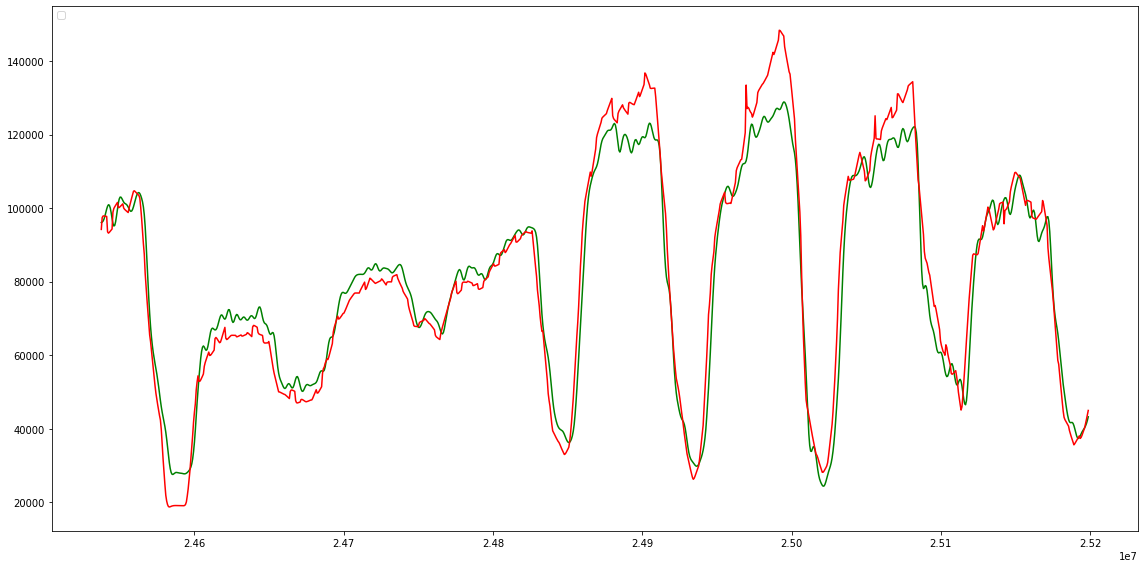

In [65]:
fig=plt.figure(figsize=(16,8))
plt.rcParams["figure.autolayout"] = True
x=df1['Time'].loc[40896:41999]
y=Df_final['Predicted Value']
y1=Df_final['Actual_Value']
plt.legend(loc="upper left")
plt.plot(x,y,label='Actual Qdot', color='green')
plt.plot(x,y1,label='LSTM Model Predictions', color='red')
plt.show()

In [ ]:
df_final[['Qdot_Storage_out','Qdot_pred']].plot()